# SVM_Code_Implimentation

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features for visualization purposes
y = iris.target

In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Creating SVM classifiers with different kernels and parameters
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', gamma='auto', C=1.0, random_state=42)


In [6]:
# Training the classifiers
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid', random_state=42)

In [7]:
# Making predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

In [8]:
# Calculating accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

In [9]:
print("Accuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (Polynomial Kernel):", accuracy_poly)
print("Accuracy (RBF Kernel):", accuracy_rbf)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Linear Kernel): 0.9
Accuracy (Polynomial Kernel): 0.6666666666666666
Accuracy (RBF Kernel): 0.8333333333333334
Accuracy (Sigmoid Kernel): 0.7666666666666667


In [10]:
# Classification report
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [11]:
# Plotting decision boundaries
def plot_decision_boundary(classifier, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()


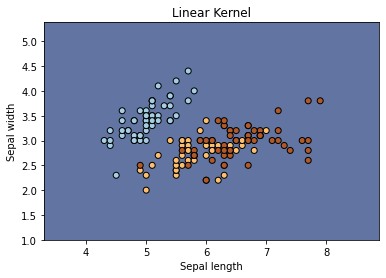

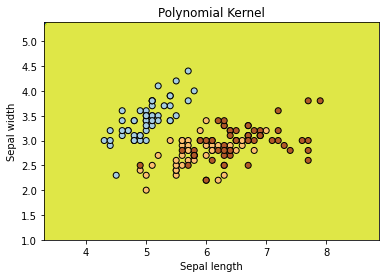

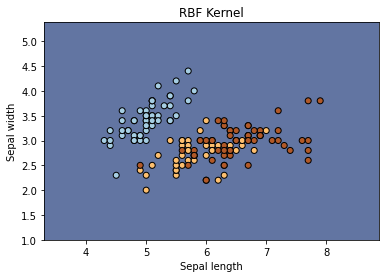

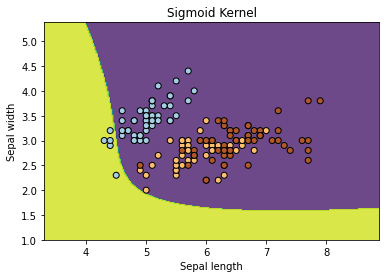

In [12]:
plot_decision_boundary(svm_linear, "Linear Kernel")
plot_decision_boundary(svm_poly, "Polynomial Kernel")
plot_decision_boundary(svm_rbf, "RBF Kernel")
plot_decision_boundary(svm_sigmoid, "Sigmoid Kernel")

# Conclusion

From the output results of the SVM classifiers with different kernel types on the Iris dataset, we can draw the following conclusions:
1.	Accuracy Comparison:

•	Linear Kernel: Achieved the highest accuracy of 90%.

•	Polynomial Kernel: Achieved an accuracy of 66.67%.

•	RBF Kernel: Achieved an accuracy of 83.33%.

•	Sigmoid Kernel: Achieved an accuracy of 76.67%.

2.	Classification Report (Linear Kernel):

•	Precision: The model achieved high precision for class 0 (100%) and decent precision for classes 1 and 2 (88% and 83%, respectively).

•	Recall: The model performed well in terms of recall for all classes, with values ranging from 78% to 100%.

•	F1-Score: The F1-score, which balances precision and recall, is high for all classes, indicating good overall performance.

3.	Overall Performance:

•	The linear kernel outperformed the other kernels in terms of accuracy, achieving the highest overall accuracy of 90%.

•	The polynomial kernel had the lowest accuracy among the four kernels, indicating that it may not be the best choice for this dataset.

•	The RBF and sigmoid kernels performed reasonably well, with accuracies of 83.33% and 76.67%, respectively.

•	The classification report for the linear kernel shows that it achieved high precision, recall, and F1-score for all classes, indicating robust performance across all metrics.

4.	Decision Boundaries:

•	Decision boundaries for the linear kernel appear to be linear, separating the classes with straight lines.

•	Polynomial kernel decision boundaries are more complex, resulting in curved separations.

•	RBF and sigmoid kernel decision boundaries are non-linear and may overlap between classes, especially in regions where data points are close together.

In conclusion, when choosing an SVM kernel for the Iris dataset, the linear kernel demonstrates the best performance in terms of accuracy and classification metrics. However, the choice of kernel may vary depending on the dataset's characteristics and the specific requirements of the problem at hand. It's essential to experiment with different kernels and parameter settings to find the optimal configuration for each scenario.
